In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
dfs = []
names = []
for data in os.listdir("../logs/experiment/meta1"):
    df = pd.read_csv(f"../logs/experiment/meta1/{data}", sep=",")
    # print(df.head())
    dfs.append(df)
    names.append(data)

In [ ]:
namess = []
for name in names:
    new_name = name.split("_")[3:7]
    nn = ""
    for n in new_name:
        nn += n + "-"
    namess.append(nn[:-1])
names = namess

In [ ]:
title_dict = {
    "r": "ReLU",
    "l": "LReLU",
    "e": "ELU",
    "s": "SELU",
}
for act in ["r", "l", "e", "s"]:
    fig, ax = plt.subplots(figsize=(12, 8))
    axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
    for i, df in enumerate(dfs):
        if not df["Value"].isnull().values.any():
            if names[i][0] == act:
                if names[i][-2] == "s":
                    ax.plot(df["Step"], df["Value"], label=names[i], color=f"C{i}")
                    if np.array(df["Step"])[-1] > 600:
                        axins.plot(df["Step"][-10:], df["Value"][-10:], color=f"C{i}")
            
    plt.title(f"Validation Loss for first Grid Search: {title_dict[act]} Models", size=18)
    plt.xlabel("Step", size=14)
    plt.ylabel("Validation Loss", size=14)
    plt.ylim(0, 1)
    plt.xlim(0, 950)
    plt.legend(bbox_to_anchor=(1.35,1.014), loc="upper right", fontsize=12)
    plt.show()

In [ ]:
activation_dict = {
    "relu": "ReLU",
    "lrelu": "LReLU",
    "elu": "ELU",
    "selu": "SELU",
}
downsampling_dict = {
    "maxpool": "Maxpooling",
    "stride": "Strided Convolution",
}
upsampling_dict = {
    "upsample": "Nearest Neighbour Upsampling",
    "stride": "Strided Convolution",
}
batchnorm_dict = {
    "True": "Enabled",
    "False": "Disabled",
}
for i, df in enumerate(dfs):
    df.dropna(inplace=True)
    meta = names[i].split("-")
    print(f"{np.round(np.array(df['Value']).min(), 6)} & {activation_dict[meta[0]]} &  {downsampling_dict[meta[1]]} &  {upsampling_dict[meta[2]]} &  {batchnorm_dict[meta[3]]}")

In [ ]:
dfs = []
names = []
for data in os.listdir("../logs/experiment/pacs_meta2"):
    df = pd.read_csv(f"../logs/experiment/pacs_meta2/{data}", sep=",")
    # print(df.head())
    dfs.append(df)
    names.append(data)

In [ ]:
namess = []
for name in names:
    new_name = name.split("_")[3:7]
    nn = ""
    for n in new_name:
        nn += n + "-"
    namess.append(nn[:-1])
names = namess

In [ ]:
for depth in [1, 2]:
    k=0
    fig, ax = plt.subplots(figsize=(12, 8))
    axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
    for i, df in enumerate(dfs):
        name = names[i].split("-")
        if int(name[1]) == depth and name[0] != "1024":
            label = name[0] + ",  "
            if name[0] != "1024":
                label += "  "
            for j in range(2,8):
                label += name[j] + "-"
            ax.plot(df["Step"], df["Value"], label=label[:-1], color=f"C{k}")
            if np.array(df["Step"])[-1] > 600:
                axins.plot(df["Step"][-10:], df["Value"][-10:], color=f"C{k}")
                axins.set_ylim(0.05, 0.075)
                axins.set_xlim(14500, 19000)
            k+=1
    for i, df in enumerate(dfs):
        name = names[i].split("-")
        if int(name[1]) == depth and name[0] == "1024":
            label = name[0] + ",  "
            if name[0] != "1024":
                label += "  "
            for j in range(2,8):
                label += name[j] + "-"
            ax.plot(df["Step"], df["Value"], label=label[:-1], color=f"C{k}")
            if np.array(df["Step"])[-1] > 600:
                axins.plot(df["Step"][-10:], df["Value"][-10:], color=f"C{k}")
                axins.set_ylim(0.05, 0.075)
                axins.set_xlim(14500, 19000)
            k+=1
            
    plt.title(f"Validation Loss for second Grid Search: Depth {depth} Models", size=18)
    plt.xlabel("Step", size=14)
    plt.ylabel("Validation Loss", size=14)
    plt.ylim(0, 0.2)
    plt.xlim(0, 20000)
    plt.legend(bbox_to_anchor=(1.43,1.014), loc="upper right", fontsize=12)
    plt.show()

In [ ]:
k=0
fig, ax = plt.subplots(figsize=(12, 8))
axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
for i, df in enumerate(dfs):
    name = names[i].split("-")
    if name[0] == "1024":
        label = name[0] + ",  "
        if name[0] != "1024":
            label += "  "
        label += name[1] + ",  "
        for j in range(2,8):
            label += name[j] + "-"
        ax.plot(df["Step"], df["Value"], label=label[:-1], color=f"C{k}")
        if np.array(df["Step"])[-1] > 600:
            axins.plot(df["Step"][-10:], df["Value"][-10:], color=f"C{k}")
            axins.set_ylim(0.05, 0.075)
            axins.set_xlim(14500, 19000)
        k+=1
        
plt.title(f"Validation Loss for second Grid Search: Latent Size 1024 Models", size=18)
plt.xlabel("Step", size=14)
plt.ylabel("Validation Loss", size=14)
plt.ylim(0, 0.2)
plt.xlim(0, 20000)
plt.legend(bbox_to_anchor=(1.43,1.014), loc="upper right", fontsize=12)
plt.show()

In [ ]:
for i, df in enumerate(dfs):
    # df.dropna(inplace=True)
    meta = names[i].split("-")
    depth = meta[1]
    latent_size = meta[0]
    out_channels = meta[2]
    for j in range(3,7):
        out_channels += ", " + meta[j]
    print(f"{np.round(np.array(df['Value']).min(), 6)} & {depth} & {latent_size} & {out_channels}")

In [ ]:
dfs = []
names = []
for data in os.listdir("../logs/experiment/rmnist_classifier"):
    df = pd.read_csv(f"../logs/experiment/rmnist_classifier/{data}", sep=",")
    # print(df.head())
    dfs.append(df)
    names.append(data)
print(names[0])
print(dfs[0].head())
print(dfs[0].tail())

In [ ]:
# ERM
linearity_dict = {
    "False": "Shallow",
    "True": "Deep",
}
fig, ax = plt.subplots(figsize=(12, 8))
# axins = ax.inset_axes([0.5, 0.65, 0.48, 0.32])
# axins.set_xticks([30000, 40000])
k = 0
for i, df in enumerate(dfs):
    name = names[i].split("_")
    if name[3] == "ERM" and name[5] == "0.0":
        label = linearity_dict[name[4]] + " ERM, Weight Decay: " + name[5]
        ax.plot(df["Step"], df["Value"], label=label, color=f"C{k}")
        # if np.array(df["Value"])[-1] < 0.2:
            # axins.plot(df["Step"][-10:], df["Value"][-10:], color=f"C{k}")
        k += 1
for i, df in enumerate(dfs):
    name = names[i].split("_")
    if name[3] == "ERM" and name[5] == "0.01":
        label = linearity_dict[name[4]] + " ERM, Weight Decay: " + name[5]
        ax.plot(df["Step"], df["Value"], label=label, color=f"C{k}")
        # if np.array(df["Value"])[-1] < 0.2:
            # axins.plot(df["Step"][-10:], df["Value"][-10:], color=f"C{k}")
        k += 1
for i, df in enumerate(dfs):
    name = names[i].split("_")
    if name[3] == "ERM" and name[5] == "0.1":
        label = linearity_dict[name[4]] + " ERM, Weight Decay: " + name[5]
        ax.plot(df["Step"], df["Value"], label=label, color=f"C{k}")
        # if np.array(df["Value"])[-1] < 0.2:
            # axins.plot(df["Step"][-10:], df["Value"][-10:], color=f"C{k}")
        k += 1
        
plt.title(f"Validation Loss for Classifier Grid Search: ERM Models", size=18)
plt.xlabel("Step", size=14)
plt.ylabel("Validation Loss", size=14)
# plt.ylim(0, 1)
# plt.xlim(0, 950)
plt.legend(bbox_to_anchor=(1.4,1.014), loc="upper right", fontsize=12)
plt.show()

In [ ]:
# CNN
title_dict = {
    "relu": "ReLU",
    "elu": "ELU",
    "selu": "SELU",
}
out_c_dict = {
    0: "[32, 32, 64]",
    1: "[64, 64, 128]",
    2: "[128, 128, 256]",
}
latent_dict = {
    0: "32",
    1: "64",
    2: "128",
}
for act in ["relu", "selu", "elu"]:
# axins = ax.inset_axes([0.5, 0.65, 0.48, 0.32])
# axins.set_xticks([30000, 40000])
    fig, axes = plt.subplots(nrows=2, figsize=(12, 8), sharex=True)
    for j in range(2):
        axes[j].scatter([0], [0], color="white", label=f"Models with Depth: {j+1}")
        k = 0
        for i, df in enumerate(dfs):
            name = names[i].split("_")
            if name[3] == "CNN" and name[6] == act:
                out_cs = name[7].split("-")
                out_c ="[" + out_cs[0] + ", " + out_cs[1] + ", " + out_cs[2] + "]"
                if name[5] == str(j+1):
                    if name[4] == "128":
                        spacer = ""
                    else:
                        spacer = "  "
                    label = f"{name[4]}, {spacer}{out_c}"
                    label += " " * abs(23 - len(label))
                    axes[j].plot(df["Step"], df["Value"], label=label, color=f"C{k}")
                    # if np.array(df["Value"])[-1] < 0.2:
                        # axins.plot(df["Step"][-10:], df["Value"][-10:], color=f"C{k}")
                    axes[j].legend(bbox_to_anchor=(1.35,1.014), loc="upper right", fontsize=12)
                    k += 1
        if act == "relu":
            top = 1.3
        elif act == "elu":
            top = 0.275
        elif act == "selu":
            top = 0.275
        axes[j].set_ylim(0, top)
        axes[j].set_xlim(0, 45000)
            
    axes[0].set_title(f"Validation Loss for Classifier Grid Search for CNN: {title_dict[act]} Models", size=18)
    axes[1].set_xlabel("Step", size=14)
    axes[0].set_ylabel("Validation Loss", size=14)
    axes[1].set_ylabel("Validation Loss", size=14)
    plt.tight_layout()
    plt.show()

In [ ]:
# CNN
title_dict = {
    "relu": "ReLU",
    "elu": "ELU",
    "selu": "SELU",
}
out_c_dict = {
    0: "[32, 32, 64]",
    1: "[64, 64, 128]",
    2: "[128, 128, 256]",
}
latent_dict = {
    0: "32",
    1: "64",
    2: "128",
}
# axins = ax.inset_axes([0.5, 0.65, 0.48, 0.32])
# axins.set_xticks([30000, 40000])
fig, axes = plt.subplots(nrows=2, figsize=(12, 8), sharex=True)
for j in range(2):
    axes[j].scatter([0], [0], color="white", label=f"Models with Depth: {j+1}")
    k = 0
    for i, df in enumerate(dfs):
        name = names[i].split("_")
        if name[3] == "CNN" and name[6] == act:
            out_cs = name[7].split("-")
            out_c ="[" + out_cs[0] + ", " + out_cs[1] + ", " + out_cs[2] + "]"
            if name[5] == str(j+1):
                if name[4] == "128":
                    spacer = ""
                else:
                    spacer = "  "
                label = f"{name[4]}, {spacer}{out_c}"
                label += " " * abs(23 - len(label))
                axes[j].plot(df["Step"], df["Value"], label=label, color=f"C{k}")
                # if np.array(df["Value"])[-1] < 0.2:
                    # axins.plot(df["Step"][-10:], df["Value"][-10:], color=f"C{k}")
                axes[j].legend(bbox_to_anchor=(1.35,1.014), loc="upper right", fontsize=12)
                k += 1
    if act == "relu":
        top = 1.3
    elif act == "elu":
        top = 0.275
    elif act == "selu":
        top = 0.275
    axes[j].set_ylim(0, top)
    axes[j].set_xlim(0, 45000)
            
    axes[0].set_title(f"Validation Loss for Classifier Grid Search for CNN: {title_dict[act]} Models", size=18)
    axes[1].set_xlabel("Step", size=14)
    axes[0].set_ylabel("Validation Loss", size=14)
    axes[1].set_ylabel("Validation Loss", size=14)
    plt.tight_layout()
    plt.show()

In [ ]:
dfs = []
names = []
for data in os.listdir("../logs/experiment/rmnist_classifier"):
    df = pd.read_csv(f"../logs/experiment/rmnist_classifier/{data}", sep=",")
    # print(df.head())
    dfs.append(df)
    names.append(data)
print(names[0])
print(dfs[0].head())
print(dfs[0].tail())

activation_dict = {
    "relu": "ReLU",
    "lrelu": "LReLU",
    "elu": "ELU",
    "selu": "SELU",
}
downsampling_dict = {
    "maxpool": "Maxpooling",
    "stride": "Strided Convolution",
}
upsampling_dict = {
    "upsample": "Nearest Neighbour Upsampling",
    "stride": "Strided Convolution",
}
batchnorm_dict = {
    "True": "Enabled",
    "False": "Disabled",
}
linearity_dict = {
    "False": "Shallow",
    "True": "Deep",
}
scores = np.zeros(len(dfs))
N = 2
for i, df in enumerate(dfs):
    #df.dropna(inplace=True)
    meta = names[i].split("-")
    # score = np.mean(np.array(df['Value'])[-N:])
    score = np.min(np.array(df["Value"]))
    # print(i, score)
    scores[i] = score
    # print(f"{np.round(np.array(df['Value']).min(), 6)} & {activation_dict[meta[0]]} &  {downsampling_dict[meta[1]]} &  {upsampling_dict[meta[2]]} &  {batchnorm_dict[meta[3]]}")
sort_inds = np.argsort(scores)
scores = scores[sort_inds]
names_sorted = []
for ind in sort_inds:
    names_sorted.append(names[ind])

print(f" Minimal Validation Loss & Architecture & Weight Decay")
print("\hline")
for i in range(len(scores)):
    name = names_sorted[i].split("_")
    if name[3] == "ERM":
        out_cs = name[7].split("-")
        out_c ="[" + out_cs[0] + ", " + out_cs[1] + ", " + out_cs[2] + "]"
        print(f"{np.round(scores[i], 5)} & {linearity_dict[name[4]]} & {name[5]}")


print(f" Minimal Validation Loss & Latent Size & Depth & Activation & Output Channels")
print("\hline")
for i in range(len(scores)):
    name = names_sorted[i].split("_")
    if name[3] == "CNN":
        out_cs = name[7].split("-")
        out_c ="[" + out_cs[0] + ", " + out_cs[1] + ", " + out_cs[2] + "]"
        print(f"{np.round(scores[i], 5)} & {name[4]} & {name[5]} & {activation_dict[name[6]]} & {out_c}")


In [1]:
import umap

In [15]:
import torch
latent_data = torch.randn(size=(500, 1024))
reducer = umap.UMAP(random_state=17)
reducer.fit(latent_data)
embedding = reducer.embedding_

In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:

new_lat = torch.randn_like(latent_data)
normal_embedding = reducer.transform(new_lat)

In [18]:

compare_embedding = np.concatenate((embedding, normal_embedding), axis=0)

In [19]:

compare_colors = np.concatenate((np.zeros(normal_embedding.shape[0], dtype=np.int32), np.ones(normal_embedding.shape[0], dtype=np.int32)), axis=0)

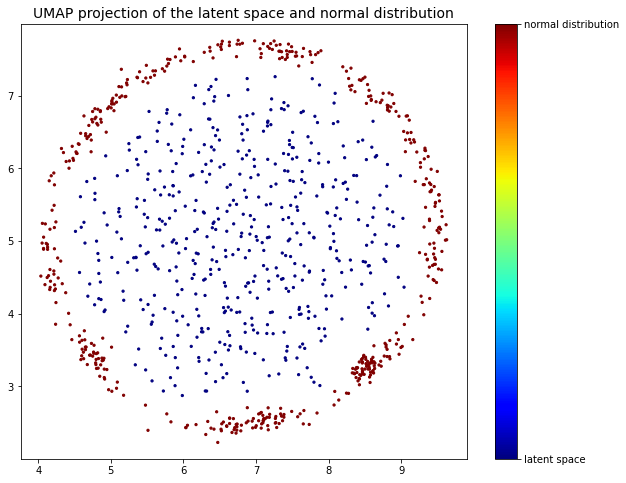

In [26]:

plt.figure(figsize=(10, 8))
plt.scatter(compare_embedding[:, 0], compare_embedding[:, 1], c=compare_colors, cmap="jet", s=5)
plt.gca().set_aspect("equal", "datalim")
cbar = plt.colorbar(boundaries=np.arange(2+1)-0.5)
cbar.set_ticks(np.arange(2))
cbar.ax.set_yticklabels(["latent space", "normal distribution"])
plt.title("UMAP projection of the latent space and normal distribution", fontsize=14)
plt.show()

In [1]:
import pandas as pd
import tensorboard as tb

In [52]:
filepath = "../logs/experiment/rmnist_meta4/version_0/events.out.tfevents.1646341545.kollemate.iwr.uni-heidelberg.de.30143.0"
print(os.getcwd())
with open (filepath, "r", errors="ignore", encoding="cp1252") as f:
    print(f)
    lines = f.readlines()
    for line in lines:
        if "epoch"in line:
            pass
            # print(line)
            # print(u"§³åÉ".encode("cp1252"))#.decode("latin1"))

c:\Users\gooog\Desktop\Bachelor\Code\bachelor-lightning\plotting
<_io.TextIOWrapper name='../logs/experiment/rmnist_meta4/version_0/events.out.tfevents.1646341545.kollemate.iwr.uni-heidelberg.de.30143.0' mode='r' encoding='cp1252'>


In [62]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
event_acc = EventAccumulator('../logs/experiment/rmnist_meta4/model_01234/version_0/events.out.tfevents.1646341545.kollemate.iwr.uni-heidelberg.de.30143.0')
event_acc.Reload()
# Show all tags in the log file
print(event_acc.Tags())

# E. g. get wall clock, number of steps and value for a scalar 'Accuracy'
w_times, step_nums, vals = zip(*event_acc.Scalars('epoch'))

{'images': ['train_reconstruction', 'val_reconstruction', 'generated_0_0', 'generated_0_1', 'generated_0_2', 'generated_0_3', 'generated_0_4', 'generated_0_5', 'generated_0_6', 'generated_0_7', 'generated_0_8', 'generated_0_9', 'generated_15_0', 'generated_15_1', 'generated_15_2', 'generated_15_3', 'generated_15_4', 'generated_15_5', 'generated_15_6', 'generated_15_7', 'generated_15_8', 'generated_15_9', 'generated_30_0', 'generated_30_1', 'generated_30_2', 'generated_30_3', 'generated_30_4', 'generated_30_5', 'generated_30_6', 'generated_30_7', 'generated_30_8', 'generated_30_9', 'generated_45_0', 'generated_45_1', 'generated_45_2', 'generated_45_3', 'generated_45_4', 'generated_45_5', 'generated_45_6', 'generated_45_7', 'generated_45_8', 'generated_45_9', 'generated_60_0', 'generated_60_1', 'generated_60_2', 'generated_60_3', 'generated_60_4', 'generated_60_5', 'generated_60_6', 'generated_60_7', 'generated_60_8', 'generated_60_9', 'domain_transfer_to_0', 'domain_transfer_to_15', 'do

In [63]:
print(w_times, step_nums, vals)

(1646341564.656131, 1646341578.7970185, 1646341592.8918004, 1646341608.1368968, 1646341627.2721286, 1646341661.0457191, 1646341707.2605925, 1646341753.2809715, 1646341799.0315611, 1646341845.1004763, 1646341891.6379023, 1646341952.2103953, 1646341987.6922858, 1646342034.012884, 1646342080.3292668, 1646342126.6694186, 1646342167.3510835, 1646342189.709909, 1646342226.5690506, 1646342271.2115808, 1646342317.1125653, 1646342363.2428145, 1646342409.2788308, 1646342455.256135, 1646342503.0039616, 1646342559.9804876, 1646342605.837354, 1646342652.079413, 1646342698.2288811, 1646342737.566861, 1646342758.4782333, 1646342794.1450813, 1646342838.4419165, 1646342884.6336172, 1646342931.0294795, 1646342977.2506483, 1646343023.5167394, 1646343057.2009819, 1646343135.146965, 1646343181.2737708, 1646343227.40954, 1646343272.8093681, 1646343311.4201007, 1646343336.4341733, 1646343368.9821534, 1646343414.8634968, 1646343461.1583571, 1646343507.7523136, 1646343554.1181777, 1646343620.160901, 1646343666

In [65]:
event_acc.Reload()

w_times, step_nums, vals = zip(*event_acc.Scalars('epoch'))
print(vals[-1])

322.0


In [3]:
dfs = []
names = []
for data in os.listdir("../logs/experiment/dg_results"):
    df = pd.read_csv(f"../logs/experiment/dg_results/{data}", sep=",")
    # print(df.head())
    dfs.append(df)
    names.append(data)

In [4]:
print(dfs[0].head())
print(names[0])

      Wall time  Step     Value
0  1.646681e+09     0  0.723607
run-dg_results_id_runs_new_10_1_CNN_augmented_01234_version_0-tag-test_loss.csv


In [5]:
data = {
    names[i]: dfs[i]["Value"][0] for i in range(len(dfs))
}

In [6]:
print(data)

{'run-dg_results_id_runs_new_10_1_CNN_augmented_01234_version_0-tag-test_loss.csv': 0.7236074209213257, 'run-dg_results_id_runs_new_10_1_CNN_augmented_01235_version_0-tag-test_loss.csv': 0.9754934310913086, 'run-dg_results_id_runs_new_10_1_CNN_augmented_01245_version_0-tag-test_loss.csv': 0.9714842438697816, 'run-dg_results_id_runs_new_10_1_CNN_augmented_01345_version_0-tag-test_loss.csv': 0.1150596439838409, 'run-dg_results_id_runs_new_10_1_CNN_augmented_02345_version_0-tag-test_loss.csv': 0.7201389074325562, 'run-dg_results_id_runs_new_10_1_CNN_augmented_12345_version_0-tag-test_loss.csv': 1.0063486099243164, 'run-dg_results_id_runs_new_10_1_ERM_augmented_01234_version_0-tag-test_loss.csv': 0.0528787076473236, 'run-dg_results_id_runs_new_10_1_ERM_augmented_01235_version_0-tag-test_loss.csv': 0.05225071310997, 'run-dg_results_id_runs_new_10_1_ERM_augmented_01245_version_0-tag-test_loss.csv': 0.0413004606962204, 'run-dg_results_id_runs_new_10_1_ERM_augmented_01345_version_0-tag-test_lo

In [11]:
value_arr = np.array(list(data.values()))
name_arr = np.array(list(data.keys()))
print(value_arr[0])
print(name_arr[0])
inds = np.argsort(value_arr)
value_arr = value_arr[inds]
name_arr = name_arr[inds]

0.7236074209213257
run-dg_results_id_runs_new_10_1_CNN_augmented_01234_version_0-tag-test_loss.csv


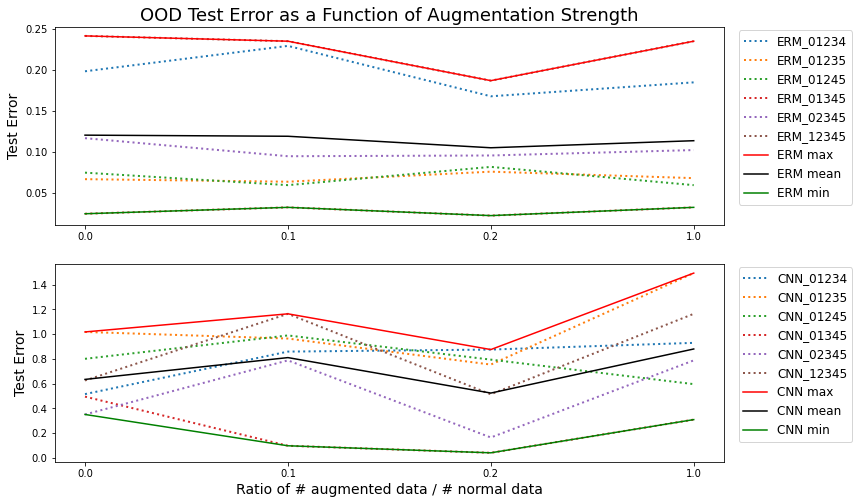

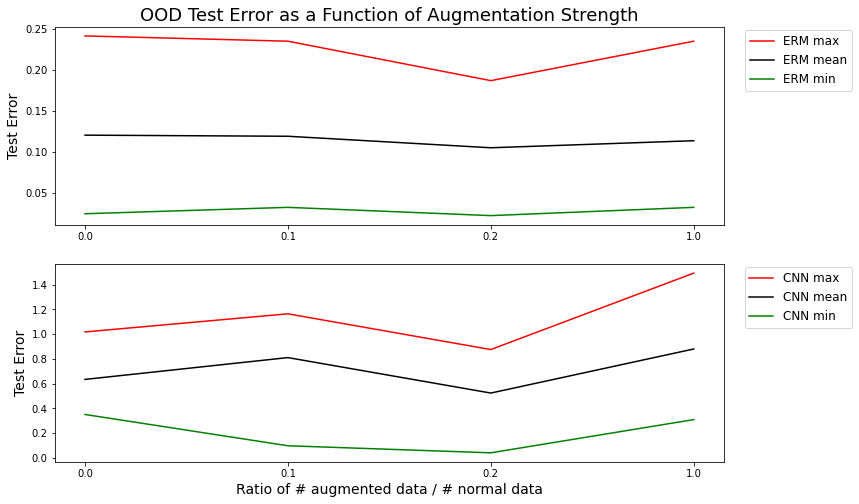

In [76]:
plt.figure(figsize=(12, 8))
d = {}
for v, n in zip(value_arr, name_arr):
    if "ood_runs" in n and "long" not in n:
        meta = n.split("_")
        k = meta[7] + "_" + meta[9]
        # print(k)
        if k not in list(d.keys()):
            d[k] = [100, 100, 100, 100]
        if "normal" in n:
            d[k][0] = v
        elif "10_1" in n:
            d[k][1] = v
        elif "5_1" in n:
            d[k][2] = v
        elif "1_1" in n:
            d[k][3] = v
plt.subplot(2, 1, 1)
plt.title("OOD Test Error as a Function of Augmentation Strength", size=18)
ERM_mean = np.zeros(4)
ERM_max = np.zeros(4)
ERM_min = np.ones(4) * 100
for k in ["01234", "01235", "01245", "01345", "02345", "12345"]:
    k = "ERM_" + k
    plt.plot(np.arange(4), d[k], label=k, ls=":", linewidth=2)
    ERM_mean += np.array(d[k]) / 6.0
    for i, v in enumerate(d[k]):
        if v > ERM_max[i]:
            ERM_max[i] = v
        if v < ERM_min[i]:
            ERM_min[i] = v
plt.ylabel("Test Error", size=14)
plt.xticks([0, 1, 2, 3], ["0.0", "0.1", "0.2", "1.0"])
plt.plot(np.arange(4), ERM_max, label="ERM max", color="r")
plt.plot(np.arange(4), ERM_mean, label="ERM mean", color="k")
plt.plot(np.arange(4), ERM_min, label="ERM min", color="g")
plt.legend(bbox_to_anchor=(1.2,1.014), loc="upper right", fontsize=12)
plt.subplot(2, 1, 2)
CNN_mean = np.zeros(4)
CNN_max = np.zeros(4)
CNN_min = np.ones(4) * 100
for k in ["01234", "01235", "01245", "01345", "02345", "12345"]:
    k = "CNN_" + k
    plt.plot(np.arange(4), d[k], label=k, ls=":", linewidth=2)
    CNN_mean += np.array(d[k]) / 6.0
    for i, v in enumerate(d[k]):
        if v > CNN_max[i]:
            CNN_max[i] = v
        if v < CNN_min[i]:
            CNN_min[i] = v
plt.ylabel("Test Error", size=14)
plt.xlabel("Ratio of # augmented data / # normal data", size=14)
plt.xticks([0, 1, 2, 3], ["0.0", "0.1", "0.2", "1.0"])
plt.plot(np.arange(4), CNN_max, label="CNN max", color="r")
plt.plot(np.arange(4), CNN_mean, label="CNN mean", color="k")
plt.plot(np.arange(4), CNN_min, label="CNN min", color="g")
plt.legend(bbox_to_anchor=(1.2,1.014), loc="upper right", fontsize=12)
plt.show()

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.title("OOD Test Error as a Function of Augmentation Strength", size=18)
plt.plot(np.arange(4), ERM_max, label="ERM max", color="r")
plt.plot(np.arange(4), ERM_mean, label="ERM mean", color="k")
plt.plot(np.arange(4), ERM_min, label="ERM min", color="g")
plt.legend(bbox_to_anchor=(1.2,1.014), loc="upper right", fontsize=12)
plt.ylabel("Test Error", size=14)
plt.xticks([0, 1, 2, 3], ["0.0", "0.1", "0.2", "1.0"])
plt.subplot(2, 1, 2)
plt.plot(np.arange(4), CNN_max, label="CNN max", color="r")
plt.plot(np.arange(4), CNN_mean, label="CNN mean", color="k")
plt.plot(np.arange(4), CNN_min, label="CNN min", color="g")
plt.legend(bbox_to_anchor=(1.2,1.014), loc="upper right", fontsize=12)
plt.ylabel("Test Error", size=14)
plt.xlabel("Ratio of # augmented data / # normal data", size=14)
plt.xticks([0, 1, 2, 3], ["0.0", "0.1", "0.2", "1.0"])
plt.show()

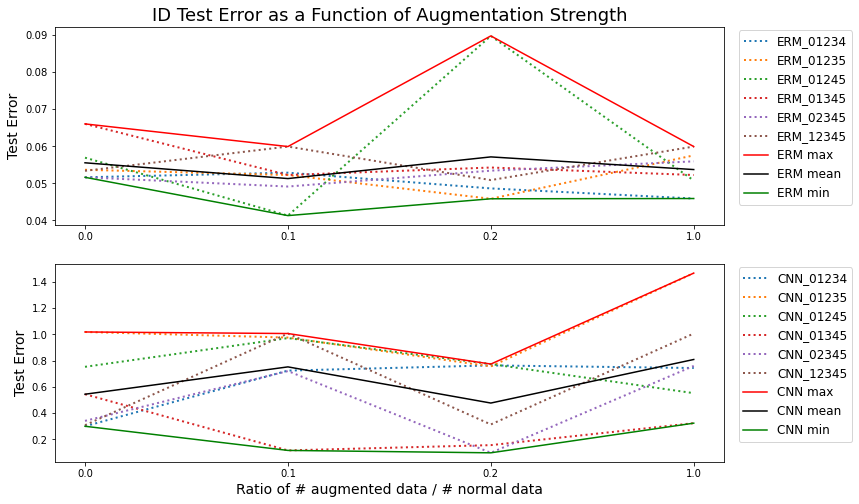

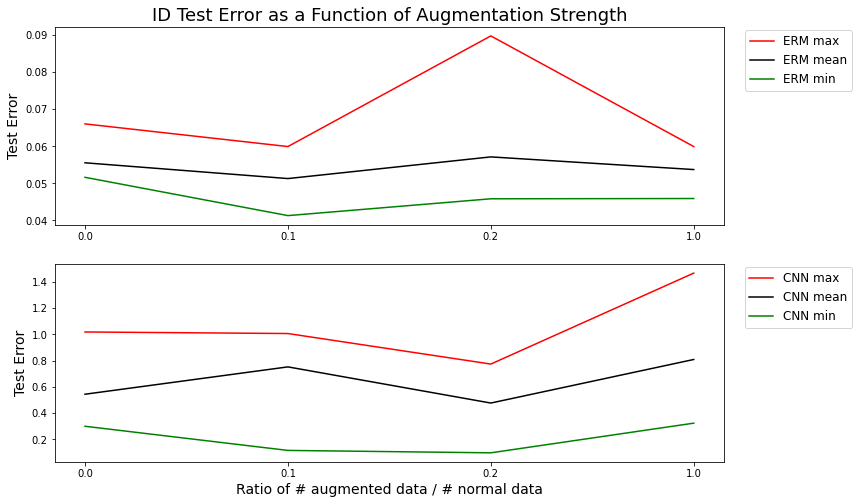

In [77]:
plt.figure(figsize=(12, 8))
d = {}
for v, n in zip(value_arr, name_arr):
    if "id_runs" in n and "long" not in n:
        meta = n.split("_")
        k = meta[7] + "_" + meta[9]
        # print(k)
        if k not in list(d.keys()):
            d[k] = [100, 100, 100, 100]
        if "normal" in n:
            d[k][0] = v
        elif "10_1" in n:
            d[k][1] = v
        elif "5_1" in n:
            d[k][2] = v
        elif "1_1" in n:
            d[k][3] = v
plt.subplot(2, 1, 1)
plt.title("ID Test Error as a Function of Augmentation Strength", size=18)
ERM_mean = np.zeros(4)
ERM_max = np.zeros(4)
ERM_min = np.ones(4) * 100
for k in ["01234", "01235", "01245", "01345", "02345", "12345"]:
    k = "ERM_" + k
    plt.plot(np.arange(4), d[k], label=k, ls=":", linewidth=2)
    ERM_mean += np.array(d[k]) / 6.0
    for i, v in enumerate(d[k]):
        if v > ERM_max[i]:
            ERM_max[i] = v
        if v < ERM_min[i]:
            ERM_min[i] = v
plt.ylabel("Test Error", size=14)
plt.xticks([0, 1, 2, 3], ["0.0", "0.1", "0.2", "1.0"])
plt.plot(np.arange(4), ERM_max, label="ERM max", color="r")
plt.plot(np.arange(4), ERM_mean, label="ERM mean", color="k")
plt.plot(np.arange(4), ERM_min, label="ERM min", color="g")
plt.legend(bbox_to_anchor=(1.2,1.014), loc="upper right", fontsize=12)
plt.subplot(2, 1, 2)
CNN_mean = np.zeros(4)
CNN_max = np.zeros(4)
CNN_min = np.ones(4) * 100
for k in ["01234", "01235", "01245", "01345", "02345", "12345"]:
    k = "CNN_" + k
    plt.plot(np.arange(4), d[k], label=k, ls=":", linewidth=2)
    CNN_mean += np.array(d[k]) / 6.0
    for i, v in enumerate(d[k]):
        if v > CNN_max[i]:
            CNN_max[i] = v
        if v < CNN_min[i]:
            CNN_min[i] = v
plt.ylabel("Test Error", size=14)
plt.xlabel("Ratio of # augmented data / # normal data", size=14)
plt.xticks([0, 1, 2, 3], ["0.0", "0.1", "0.2", "1.0"])
plt.plot(np.arange(4), CNN_max, label="CNN max", color="r")
plt.plot(np.arange(4), CNN_mean, label="CNN mean", color="k")
plt.plot(np.arange(4), CNN_min, label="CNN min", color="g")
plt.legend(bbox_to_anchor=(1.2,1.014), loc="upper right", fontsize=12)
plt.show()

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.title("ID Test Error as a Function of Augmentation Strength", size=18)
plt.plot(np.arange(4), ERM_max, label="ERM max", color="r")
plt.plot(np.arange(4), ERM_mean, label="ERM mean", color="k")
plt.plot(np.arange(4), ERM_min, label="ERM min", color="g")
plt.legend(bbox_to_anchor=(1.2,1.014), loc="upper right", fontsize=12)
plt.ylabel("Test Error", size=14)
plt.xticks([0, 1, 2, 3], ["0.0", "0.1", "0.2", "1.0"])
plt.subplot(2, 1, 2)
plt.plot(np.arange(4), CNN_max, label="CNN max", color="r")
plt.plot(np.arange(4), CNN_mean, label="CNN mean", color="k")
plt.plot(np.arange(4), CNN_min, label="CNN min", color="g")
plt.legend(bbox_to_anchor=(1.2,1.014), loc="upper right", fontsize=12)
plt.ylabel("Test Error", size=14)
plt.xlabel("Ratio of # augmented data / # normal data", size=14)
plt.xticks([0, 1, 2, 3], ["0.0", "0.1", "0.2", "1.0"])
plt.show()

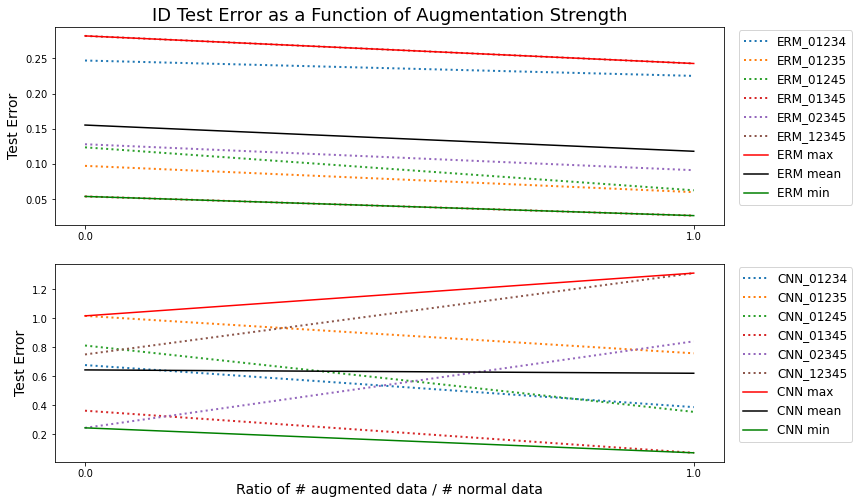

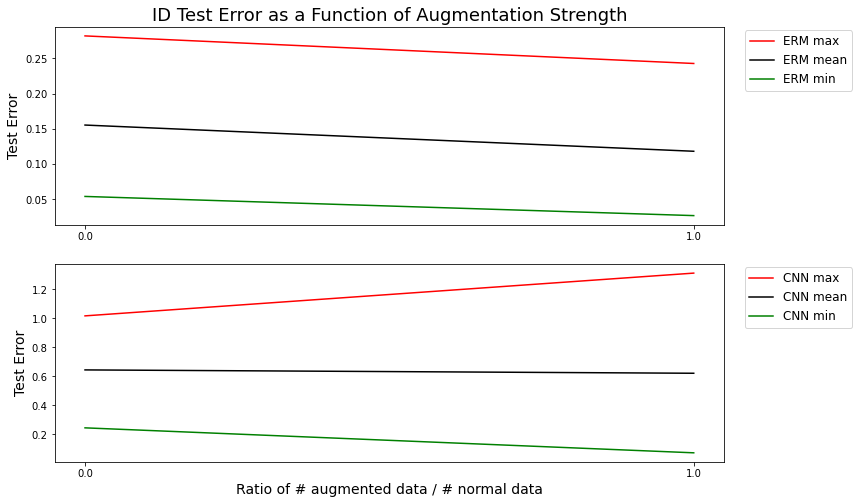

In [78]:
plt.figure(figsize=(12, 8))
d = {}
for v, n in zip(value_arr, name_arr):
    if "ood_runs" in n and "long" in n:
        meta = n.split("_")
        # print(meta)
        k = meta[8] + "_" + meta[10]
        # print(k)
        if k not in list(d.keys()):
            d[k] = [100, 100]
        if "normal" in n:
            d[k][0] = v
        elif "augmented" in n:
            d[k][1] = v
plt.subplot(2, 1, 1)
plt.title("ID Test Error as a Function of Augmentation Strength", size=18)
ERM_mean = np.zeros(2)
ERM_max = np.zeros(2)
ERM_min = np.ones(2) * 100
for k in ["01234", "01235", "01245", "01345", "02345", "12345"]:
    k = "ERM_" + k
    plt.plot(np.arange(2), d[k], label=k, ls=":", linewidth=2)
    ERM_mean += np.array(d[k]) / 6.0
    for i, v in enumerate(d[k]):
        if v > ERM_max[i]:
            ERM_max[i] = v
        if v < ERM_min[i]:
            ERM_min[i] = v
plt.ylabel("Test Error", size=14)
plt.xticks([0, 1], ["0.0", "1.0"])
plt.plot(np.arange(2), ERM_max, label="ERM max", color="r")
plt.plot(np.arange(2), ERM_mean, label="ERM mean", color="k")
plt.plot(np.arange(2), ERM_min, label="ERM min", color="g")
plt.legend(bbox_to_anchor=(1.2,1.014), loc="upper right", fontsize=12)
plt.subplot(2, 1, 2)
CNN_mean = np.zeros(2)
CNN_max = np.zeros(2)
CNN_min = np.ones(2) * 100
for k in ["01234", "01235", "01245", "01345", "02345", "12345"]:
    k = "CNN_" + k
    plt.plot(np.arange(2), d[k], label=k, ls=":", linewidth=2)
    CNN_mean += np.array(d[k]) / 6.0
    for i, v in enumerate(d[k]):
        if v > CNN_max[i]:
            CNN_max[i] = v
        if v < CNN_min[i]:
            CNN_min[i] = v
plt.ylabel("Test Error", size=14)
plt.xlabel("Ratio of # augmented data / # normal data", size=14)
plt.xticks([0, 1], ["0.0", "1.0"])
plt.plot(np.arange(2), CNN_max, label="CNN max", color="r")
plt.plot(np.arange(2), CNN_mean, label="CNN mean", color="k")
plt.plot(np.arange(2), CNN_min, label="CNN min", color="g")
plt.legend(bbox_to_anchor=(1.2,1.014), loc="upper right", fontsize=12)
plt.show()

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.title("ID Test Error as a Function of Augmentation Strength", size=18)
plt.plot(np.arange(2), ERM_max, label="ERM max", color="r")
plt.plot(np.arange(2), ERM_mean, label="ERM mean", color="k")
plt.plot(np.arange(2), ERM_min, label="ERM min", color="g")
plt.legend(bbox_to_anchor=(1.2,1.014), loc="upper right", fontsize=12)
plt.ylabel("Test Error", size=14)
plt.xticks([0, 1], ["0.0", "1.0"])
plt.subplot(2, 1, 2)
plt.plot(np.arange(2), CNN_max, label="CNN max", color="r")
plt.plot(np.arange(2), CNN_mean, label="CNN mean", color="k")
plt.plot(np.arange(2), CNN_min, label="CNN min", color="g")
plt.legend(bbox_to_anchor=(1.2,1.014), loc="upper right", fontsize=12)
plt.ylabel("Test Error", size=14)
plt.xlabel("Ratio of # augmented data / # normal data", size=14)
plt.xticks([0, 1], ["0.0", "1.0"])
plt.show()

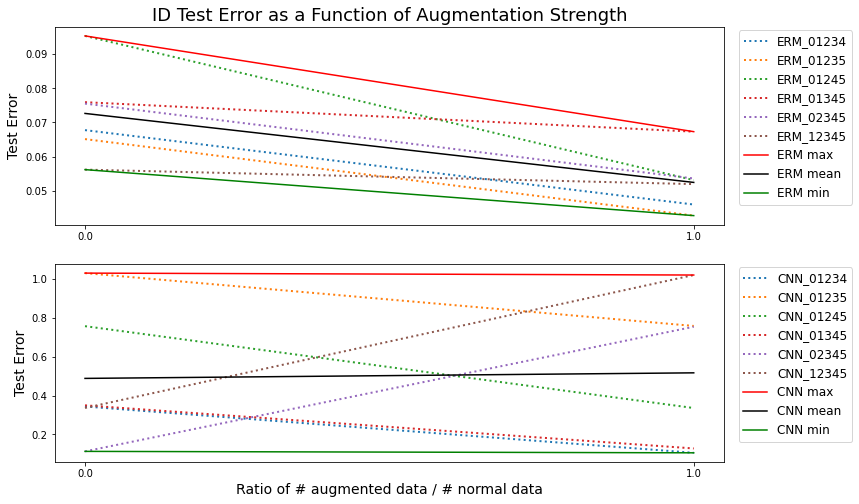

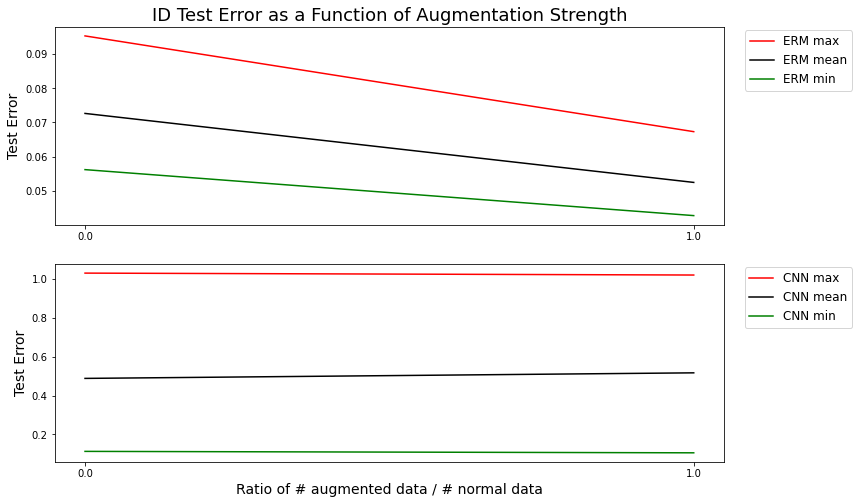

In [79]:
plt.figure(figsize=(12, 8))
d = {}
for v, n in zip(value_arr, name_arr):
    if "id_runs" in n and "long" in n:
        meta = n.split("_")
        # print(meta)
        k = meta[8] + "_" + meta[10]
        # print(k)
        if k not in list(d.keys()):
            d[k] = [100, 100]
        if "normal" in n:
            d[k][0] = v
        elif "augmented" in n:
            d[k][1] = v
plt.subplot(2, 1, 1)
plt.title("ID Test Error as a Function of Augmentation Strength", size=18)
ERM_mean = np.zeros(2)
ERM_max = np.zeros(2)
ERM_min = np.ones(2) * 100
for k in ["01234", "01235", "01245", "01345", "02345", "12345"]:
    k = "ERM_" + k
    plt.plot(np.arange(2), d[k], label=k, ls=":", linewidth=2)
    ERM_mean += np.array(d[k]) / 6.0
    for i, v in enumerate(d[k]):
        if v > ERM_max[i]:
            ERM_max[i] = v
        if v < ERM_min[i]:
            ERM_min[i] = v
plt.ylabel("Test Error", size=14)
plt.xticks([0, 1], ["0.0", "1.0"])
plt.plot(np.arange(2), ERM_max, label="ERM max", color="r")
plt.plot(np.arange(2), ERM_mean, label="ERM mean", color="k")
plt.plot(np.arange(2), ERM_min, label="ERM min", color="g")
plt.legend(bbox_to_anchor=(1.2,1.014), loc="upper right", fontsize=12)
plt.subplot(2, 1, 2)
CNN_mean = np.zeros(2)
CNN_max = np.zeros(2)
CNN_min = np.ones(2) * 100
for k in ["01234", "01235", "01245", "01345", "02345", "12345"]:
    k = "CNN_" + k
    plt.plot(np.arange(2), d[k], label=k, ls=":", linewidth=2)
    CNN_mean += np.array(d[k]) / 6.0
    for i, v in enumerate(d[k]):
        if v > CNN_max[i]:
            CNN_max[i] = v
        if v < CNN_min[i]:
            CNN_min[i] = v
plt.ylabel("Test Error", size=14)
plt.xlabel("Ratio of # augmented data / # normal data", size=14)
plt.xticks([0, 1], ["0.0", "1.0"])
plt.plot(np.arange(2), CNN_max, label="CNN max", color="r")
plt.plot(np.arange(2), CNN_mean, label="CNN mean", color="k")
plt.plot(np.arange(2), CNN_min, label="CNN min", color="g")
plt.legend(bbox_to_anchor=(1.2,1.014), loc="upper right", fontsize=12)
plt.show()

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.title("ID Test Error as a Function of Augmentation Strength", size=18)
plt.plot(np.arange(2), ERM_max, label="ERM max", color="r")
plt.plot(np.arange(2), ERM_mean, label="ERM mean", color="k")
plt.plot(np.arange(2), ERM_min, label="ERM min", color="g")
plt.legend(bbox_to_anchor=(1.2,1.014), loc="upper right", fontsize=12)
plt.ylabel("Test Error", size=14)
plt.xticks([0, 1], ["0.0", "1.0"])
plt.subplot(2, 1, 2)
plt.plot(np.arange(2), CNN_max, label="CNN max", color="r")
plt.plot(np.arange(2), CNN_mean, label="CNN mean", color="k")
plt.plot(np.arange(2), CNN_min, label="CNN min", color="g")
plt.legend(bbox_to_anchor=(1.2,1.014), loc="upper right", fontsize=12)
plt.ylabel("Test Error", size=14)
plt.xlabel("Ratio of # augmented data / # normal data", size=14)
plt.xticks([0, 1], ["0.0", "1.0"])
plt.show()

In [ ]:
python -m tools.sweep_classifier --data RMNIST --log_name new_rmnist_classifer_1_1_long_3 --models CNN_augmented,ERM_augmented,CNN_normal,ERM_normal --batch_size 32 --max_steps 200000 --max_epochs 1000 --normal_multiplier 5 --gpus 2, --random_seed 175